# Load Package

In [1]:
#待續
# ES 加上cross entropy試試看
#

In [1]:
#https://github.com/YuTaNCCU/201902_ANN_Metaheuristic/tree/master/ES
import random
import pandas as pd
from string import ascii_lowercase
from copy import deepcopy
from abc import ABCMeta, abstractmethod
from copy import deepcopy
from collections import deque
from numpy import argmax
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential 
from keras.callbacks import TensorBoard,EarlyStopping
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
import  seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
url = 'https://raw.githubusercontent.com/YuTaNCCU/201902_ANN_Metaheuristic/master/Data/red.csv'
red = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/YuTaNCCU/201902_ANN_Metaheuristic/master/Data/white.csv'
white = pd.read_csv(url)

red['WineCatg']='red'
white['WineCatg']='white'
Wine_Data = pd.concat([red, white])

display(
    red.shape,
  white.shape,
  Wine_Data.shape,
  Wine_Data.head(5),
  Wine_Data.tail(5)
)

(1599, 13)

(4898, 13)

(6497, 13)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineCatg
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineCatg
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [20]:
Wine_Data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'WineCatg'],
      dtype='object')

In [26]:
from sklearn import preprocessing
Wine_Data_preprocessed = Wine_Data.drop(['WineCatg'], axis=1)
scaler = preprocessing.StandardScaler() 
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Wine_Data_preprocessed[col] = scaler.fit_transform(Wine_Data_preprocessed[col])
Wine_Data_preprocessed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862605,0.701486,-0.115073,0.999579,-0.580068,5
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092603,0.768188,0.258120,0.797958,-0.580068,5
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986450,1.101694,-0.363868,0.327510,-0.580068,6
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5


In [27]:
print( '原本各種quality記數: \n', Wine_Data.quality.value_counts().sort_index() )
Wine_Data_Y01 = Wine_Data_preprocessed.replace({'quality':[3,4,5,6,7,8,9]},{'quality':[0,0,0,1,1,1,1]})
print( '分類成好壞兩種quality記數: \n', Wine_Data_Y01.quality.value_counts().sort_index() )
Wine_Data_Y01.head(5)

原本各種quality記數: 
 3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64
分類成好壞兩種quality記數: 
 0    2384
1    4113
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862605,0.701486,-0.115073,0.999579,-0.580068,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092603,0.768188,0.258120,0.797958,-0.580068,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986450,1.101694,-0.363868,0.327510,-0.580068,1
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,0


In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X=Wine_Data_Y01.drop(['quality'], axis=1)
y=Wine_Data_Y01['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 123)

display(
      X_train.shape,
      X_val.shape,
      X_test.shape,
      y_train.shape,
      y_val.shape,
      y_test.shape,
)

(4157, 11)

(1040, 11)

(1300, 11)

(4157,)

(1040,)

(1300,)

# Define Performance

In [29]:
def Performance(model):
    #######################
    ## Confusion Matrix  ##
    #######################

    # Predicting the Test set results
    y_score = model.predict(X_test) #X_train X_test
    y_pred = (y_score > 0.5)  #y_pred 有 NA

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred) #y_train y_test
    #######################
    ###    accuracy      ##
    #######################
    print("Our accuracy is {}%".format(round(((cm[0][0] + cm[1][1])/sum(sum(cm)))*100,2)))

    sns.heatmap(cm,annot=True)
    #######################
    ###       AUC        ##
    #######################    
    from sklearn.metrics import roc_auc_score
    print("Our AUC is {}%".format(round((roc_auc_score(y_test, y_score)*100),2)))
    
    #######################
    ###    ROC curve     ##
    #######################
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle

    from sklearn import svm, datasets
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import label_binarize
    from sklearn.multiclass import OneVsRestClassifier
    from scipy import interp
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes =2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    #Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show() 

# Define Keras Model

In [30]:
def SummarizeHistory(modelcallbacks, prfix='', UseValid=False) :
    
    plt.figure()
    plt.plot(modelcallbacks.history[prfix+'loss'])  #loss mean_absolute_error 
    if UseValid==True:
        plt.plot(modelcallbacks.history['val_'+prfix+'loss'])  #val_loss 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

    plt.figure()
    plt.plot(modelcallbacks.history[prfix+'acc'])  #loss mean_absolute_error 
    if UseValid==True:
        plt.plot(modelcallbacks.history['val_'+prfix+'acc'])  # val_mean_absolute_error
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()
    
def ModelCompile():
    from keras import backend as K
    from keras.layers import Dense
    from keras.models import Sequential, Model as keras_models_Model

    K.clear_session() 
    gpu_options = tf.GPUOptions(allow_growth=True)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
    tf.keras.backend.set_session(sess)

    model = Sequential()
    model.add(Dense(round(X_train.shape[1]/2), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(round(X_train.shape[1]/2), activation='relu'))
    model.add(Dense(round(X_train.shape[1]/4), activation='relu', name = 'IntermediateLayer'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def ModelFit(model, weights, epochs):
    #class_weight = {0: 1., 1: 1525/2632}
    model.set_weights(weights)
    modelcallbacks = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1,
        validation_data = (X_val, y_val),
        callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)],
        shuffle=True) #, class_weight=class_weight
    SummarizeHistory(modelcallbacks, UseValid=True)                                        
    weights = model.get_weights() 
    return model, weights

# Define ES Class

In [31]:
class ES:
    """
    Conducts tabu search
    """
    __metaclass__ = ABCMeta

    #default hyper parameters
    InitialSigma = None
    ParentsSize = None
    ChildSize = None
    tao = None
    
    #for input/output
    KerasModels = None
    WeightsStrucure = None   
    weights = None
    
    #for record
    cur_steps = 1
    best_weight = None
    best_score = None
    
    UseOLSReg=None
    X_train=None
    y_train=None
    
    def __init__(self, KerasModels, X_train, y_train, UseOLSReg=False, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5):
        """
        :param KerasModels: a Keras model, like keras.engine.sequential.Sequential
        :param weights: initial weights, should be a Keras model weight
        :param max_steps: maximum number of steps to run algorithm for
        :param UseOLSReg: If True, than use "OLS Regression" for the last layer
        
        """
        self.KerasModels = KerasModels
        
        self.UseOLSReg = UseOLSReg
        
        self.X_train=X_train
        self.y_train=y_train
 
        if all(isinstance(x, float) for x in [InitialSigma, tao]) and all(x > 0 for x in [InitialSigma, tao]):
            self.InitialSigma = InitialSigma
            self.tao = tao
        else:
            raise TypeError('InitialSigma & tao must be a positive float')
            
        if all(isinstance(x, int) for x in [ParentsSize, ChildSize]) and all(x > 0 for x in [ParentsSize, ChildSize]):
            self.ParentsSize = ParentsSize
            self.ChildSize = ChildSize
        else:
            raise TypeError('ParentsSize, ChildSize & max_steps must be a positive integer')

    def __str__(self): 
        return ('ES STEPS: %d ' +
                'BEST SCORE: %.4f ') % \
               (self.cur_steps, self.best_score)

    def __repr__(self):
        return self.__str__() 
    
    def _FlattenWeights(self, weights):
        """
        flatten weights
        
        param weights: keras神經網路的權重格式:nparray包在list中
        return WeightsStrucure : 神經網路各層的權重shape包在list中，unflatten時會用到
        return FlattenedWeights : 一維list包含所有的權重
        """
        WeightsStrucure = []
        FlattenedWeights = []
        for i_layer in weights:
            WeightsStrucure.append(i_layer.shape)
            if len(i_layer.shape) == 1 :# 該層權重的shape為一維 e.g. (15,)      
                FlattenedWeights.extend(i_layer)
            else :# 該層權重的shape為二維 e.g. (30, 15)  
                for i_links in i_layer:
                    FlattenedWeights.extend(i_links)
        return WeightsStrucure, FlattenedWeights

    def _UnflattenWeights(self, WeightsStrucure, ModifiedWeights):
        """
        Unflatten(回復成原本的結構) weights  
        
        param WeightsStrucure : 神經網路各層的權重shape包在list中
        param ModifiedWeights : 一維list包含所有meteHeuristic修改過的權重
        return: keras神經網路的權重格式:nparray包在list中
        """
        UnflattenWeights = []
        i_index = 0 
        for i_layer in WeightsStrucure:
            if len(i_layer) == 1 : # 該層權重的shape為一維 e.g. (15,)      
                TempList = ModifiedWeights[i_index:(i_index + i_layer[0])]
                TempList = np.asarray(TempList)
                i_index = i_index + i_layer[0]
            else : # 該層權重的shape為二維 e.g. (30, 15)  
                TempList = ModifiedWeights[i_index:(i_index + (i_layer[0]*i_layer[1]))]
                TempList = np.reshape(TempList, i_layer )
                i_index = i_index + (i_layer[0]*i_layer[1])
            UnflattenWeights.append(TempList)
        return UnflattenWeights   
    
    def _best(self, Population_Child_score):
        """
        Finds the best member of a neighborhood
        :param Population_Child_score: a np array
        :return: the indtex of N best member, N = ParentsSize
        """
        return np.array( Population_Child_score ).argsort()[::-1]
    
    def _Recombination(self, Population_Parents_Weights, Population_Parents_Sigma, rows): #GenerateParents
        """
        Generate New Parents Polulation
        """
        Population_Weights_Recombination = np.zeros(shape = (rows, Population_Parents_Weights.shape[1]))
        Population_Sigma_Recombination = np.zeros(shape = (rows, Population_Parents_Weights.shape[1]))
        for index_row, _ in enumerate( Population_Weights_Recombination ):
            """
            可能可以平行計算
            """
            TwoRowschoiced = np.random.choice(Population_Parents_Weights.shape[0], size=2, replace=False,)
            Parent1Mask = np.random.randint(2, size=Population_Parents_Weights.shape[1])
            Parent2Mask = np.full(shape = Population_Parents_Weights.shape[1], fill_value = 1 )  - Parent1Mask
            
            Population_Weights_Recombination[index_row,:] = (Population_Parents_Weights[TwoRowschoiced] * [Parent1Mask, Parent2Mask]).sum(axis=0)
            Population_Sigma_Recombination[index_row,:] = Population_Parents_Sigma[TwoRowschoiced].mean(axis=0)
        return Population_Weights_Recombination, Population_Sigma_Recombination

    def _score(self, ModifiedWeights):
        
        """
        Returns objective function value of a state

        :param state: a state
        :return: objective function value of state
        """
        UnflattenedWeights = self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = ModifiedWeights)
        self.KerasModels.set_weights(UnflattenedWeights)
        test_on_batch = self.KerasModels.test_on_batch(self.X_train, self.y_train, sample_weight=None) # return ['loss', 'acc']
        return test_on_batch[1]
    #==================
        #==================
          #==================
            #==================
    def _OLSReg(self, ModifiedWeights):
        
        """
        :param : 
        :return: Keras Models, objective function value of state
        """
        UnflattenedWeights = self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = ModifiedWeights)
        
        #%% OLS Regression
        #obtain the output of an intermediate layer
        #https://keras.io/getting-started/faq/?fbclid=IwAR3Zv35V-vmEy85anudOrlxCExXYwyG6cRL1UR0AaLPU6sZEoBjsbX-8LXQ#how-can-i-obtain-the-output-of-an-intermediate-layer
        self.KerasModels.set_weights(UnflattenedWeights)
        layer_name = 'IntermediateLayer'
        intermediate_layer_model = keras_models_Model(inputs=self.KerasModels.input,
                                         outputs=self.KerasModels.get_layer(layer_name).output)
        intermediate_output = intermediate_layer_model.predict(self.X_train)

        #fit LM
        lm =  LogisticRegression(random_state=0, solver='liblinear').fit(intermediate_output, self.y_train)
        
        #lm =  LinearRegression().fit(intermediate_output, self.y_train)
        # 印出係數, 截距 print(lm.coef_, lm.intercept_)
        
        #score
        #score = log_loss(y_pred = lm.predict(intermediate_output), y_true= self.y_train)
        
        #get OutLayerWeights
        OutLayerWeights = [np.array(lm.coef_).reshape(self.WeightsStrucure[-2]),
                           np.array(lm.intercept_).reshape(self.WeightsStrucure[-1])]

        #update ES-optimized weights
        UnflattenedWeights[-2:] = OutLayerWeights        
        
        #self.KerasModels.set_weights(UnflattenedWeights)
        #test_on_batch = self.KerasModels.test_on_batch(self.X_train, self.y_train, sample_weight=None) # return ['loss', 'acc']
        
        #print( 'score',score, 'test_on_batch',test_on_batch)
        _, OLS_Optimized_Weight = self._FlattenWeights(UnflattenedWeights)
        return OLS_Optimized_Weight 

    def run(self, weights, max_steps=5, verbose=10, useOLSReg = False, Population_Parents_Weights=None, Population_Parents_Sigma=None):
        """
        Conducts ES
        :param weights: 
        :param Population_Parents_Weights: 如果想要重複使用Parents Population，則由此傳入Weights
        :param Population_Parents_Sigma: 如果想要重複使用Parents Population，則由此傳入Sigma
        :param max_steps: 
        :param verbose: int which indicates how many iter to show score
        :return: Keras Models, best state and objective function value of best state
        """
        
        if isinstance(weights, list)  :
          
            self.WeightsStrucure, self.weights = self._FlattenWeights(weights)
            self.best_weight = self.weights
            self.best_score = self._score(self.best_weight)
        else:
            raise TypeError('initial_state must be a list') 
            
        self.max_steps = max_steps
        
        #Step1 initial
        if (Population_Parents_Weights is None) & (Population_Parents_Sigma is None):
            Population_Parents_Weights = np.array([self.weights, self.weights])         
            Population_Parents_Sigma = np.full(shape = (self.ParentsSize, len(self.weights)), fill_value = self.InitialSigma ) 
            Population_Parents_Weights, _ = self._Recombination(Population_Parents_Weights, Population_Parents_Sigma, rows = self.ParentsSize )
        else: #接續上一個phase的10%最好的個體
            Population_Parents_Weights = Population_Parents_Weights
            Population_Parents_Sigma = Population_Parents_Sigma
            
        self.cur_steps = 1
        while True:   
            #Step2 Child
            ##Discrete Recombination
            Population_Child_Weights, Population_Child_Sigma = self._Recombination(Population_Parents_Weights, Population_Parents_Sigma, rows = self.ChildSize )
            ##mutation1
            RamdonNormalValue = np.random.normal(0, 1, 1)
            RamdonNormalValueDifferent = np.random.normal(0, 1, Population_Child_Sigma.shape)
            Population_Child_Sigma = np.exp( (1-self.tao)*RamdonNormalValue + self.tao*RamdonNormalValueDifferent )
            ##mutation2
            Population_Child_Weights = Population_Child_Weights + np.random.normal(0, Population_Child_Sigma, Population_Child_Sigma.shape)
            
            
            # OLS Regression
            if useOLSReg == True:
              for i, i_Child in enumerate(Population_Child_Weights) :
                  OLS_Optimized_Weight = self._OLSReg(i_Child)
                  #print(OLS_Optimized_Weight,'i:\n', i, Population_Child_Weights[i])
                  Population_Child_Weights[i] = OLS_Optimized_Weight
            
            
            #step3 Evaluation
            Population_Child_score = []
            for i_Child in Population_Child_Weights :
                """
                可能可以平行計算
                """
                Population_Child_score.append( self._score(i_Child) )
            
            #選出最好的ParentsSize個個體做為下一代的親代
            BestIndex = self._best(Population_Child_score)
            BestNIndex = BestIndex[:self.ParentsSize] 
            Population_Parents_Weights = Population_Child_Weights[BestNIndex,:]
            Population_Parents_Sigma = Population_Child_Sigma[BestNIndex,:]
            #選出最好的10%個體做為下一phase的親代
            Best_10Percent_Index = BestIndex[:round(self.ChildSize*0.1)] #Multiphase
            Population_Best_10PercentChild_Weights = Population_Child_Weights[Best_10Percent_Index,:]
            Population_Best_10PercentChild_Sigma = Population_Child_Sigma[Best_10Percent_Index,:] 
            
            #更新best
            best_weight_This_Iter =  Population_Child_Weights[BestNIndex,:][0]
            best_score_This_Iter = self._score(Population_Child_Weights[BestNIndex,:][0])
            if best_score_This_Iter > self.best_score:
                self.best_weight =  Population_Child_Weights[BestNIndex,:][0]
                self.best_score = self._score(Population_Child_Weights[BestNIndex,:][0])
        
            #print process 
            if ((self.cur_steps ) % verbose == 0) and verbose:
               print(self)
                
            self.cur_steps = self.cur_steps + 1
            #step4 check stop criteria
            if self.cur_steps > max_steps:
                print( 'Stop: Reach max_steps' )
                break
        return self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = self.best_weight), self.best_score, Population_Best_10PercentChild_Weights, Population_Best_10PercentChild_Sigma

# Main

## 只用BP

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
Train on 4157 samples, validate on 1040 samples
Epoch 1/150
4157/4157 [==============================] - 1s 154us/step - loss: 0.6718 - acc: 0.5773 - val_loss: 0.6371 - val_acc: 0.6356
Epoch 2/150
4157/4157 [==============================] - 0s 31us/step - loss: 0.6287 - acc:

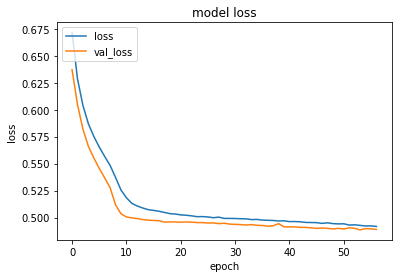

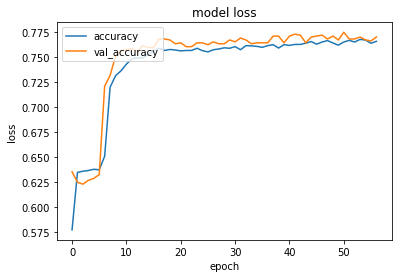

Our accuracy is 75.31%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

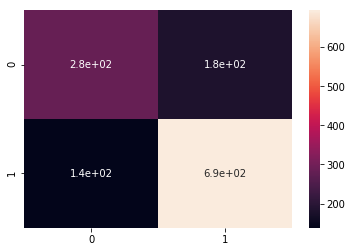

In [33]:
#只用NN
model = ModelCompile()
weights = model.get_weights() 
model, weights = ModelFit(model=model, weights=weights, epochs=150)
Performance(model)

## 只用ES

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1 BEST SCORE: 0.6344 
ES STEPS: 2 BEST SCORE: 0.6661 
ES STEPS: 3 BEST SCORE: 0.6755 
Stop: Reach max_steps
ES STEPS: 1 BEST SCORE: 0.6976 
ES STEPS: 2 BEST SCORE: 0.7053 
ES STEPS: 3 BEST SCORE: 0.7121 
ES STEPS: 4 BEST SCORE: 0.7121 
ES STEPS: 5 BEST SCORE: 0.7200

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

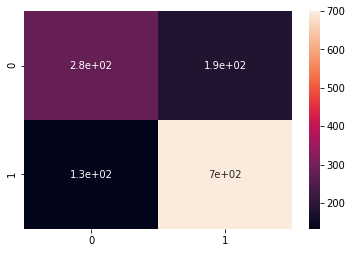

In [34]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  #model, weights = ModelFit(model=model, weights=weights, epochs=50)

  # ES
  weights, ES_Optimized_ObjVal, _, _ = MyES.run(weights, max_steps=20, verbose = 1)
    
  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 5:
      break
    
Performance(model)

## 版本1：ParentsSize = 15, ChildSize = 100

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1 BEST SCORE: 0.6716 
ES STEPS: 2 BEST SCORE: 0.6716 
ES STEPS: 3 BEST SCORE: 0.6716 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 1s 134us/step - loss: 3.9962 - acc: 0.6724 - val_loss:

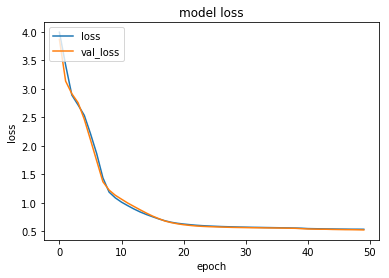

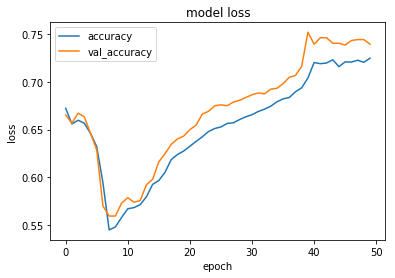

ES STEPS: 1 BEST SCORE: 0.7255 
ES STEPS: 2 BEST SCORE: 0.7255 
ES STEPS: 3 BEST SCORE: 0.7255 
ES STEPS: 4 BEST SCORE: 0.7255 
ES STEPS: 5 BEST SCORE: 0.7255 
ES STEPS: 6 BEST SCORE: 0.7255 
ES STEPS: 7 BEST SCORE: 0.7255 
ES STEPS: 8 BEST SCORE: 0.7255 
ES STEPS: 9 BEST SCORE: 0.7255 
ES STEPS: 10 BEST SCORE: 0.7255 
ES STEPS: 11 BEST SCORE: 0.7255 
ES STEPS: 12 BEST SCORE: 0.7255 
ES STEPS: 13 BEST SCORE: 0.7255 
ES STEPS: 14 BEST SCORE: 0.7255 
ES STEPS: 15 BEST SCORE: 0.7270 
ES STEPS: 16 BEST SCORE: 0.7270 
ES STEPS: 17 BEST SCORE: 0.7351 
ES STEPS: 18 BEST SCORE: 0.7351 
ES STEPS: 19 BEST SCORE: 0.7351 
ES STEPS: 20 BEST SCORE: 0.7385 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 3.2886 - acc: 0.7383 - val_loss: 3.2071 - val_acc: 0.7423
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.2967 - acc: 0.7378 - val_loss: 3.2016 - val_acc: 0.7423
Epoch 3/5

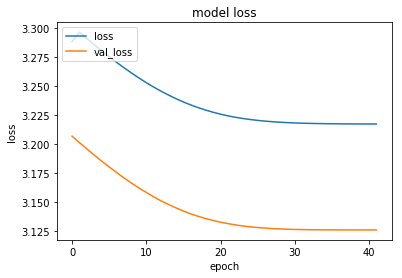

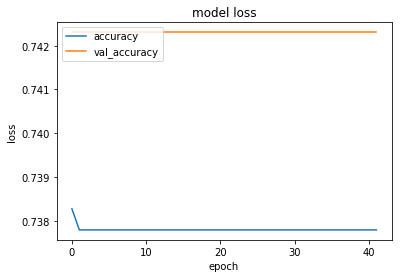

ES STEPS: 1 BEST SCORE: 0.7445 
ES STEPS: 2 BEST SCORE: 0.7450 
ES STEPS: 3 BEST SCORE: 0.7450 
ES STEPS: 4 BEST SCORE: 0.7450 
ES STEPS: 5 BEST SCORE: 0.7510 
ES STEPS: 6 BEST SCORE: 0.7510 
ES STEPS: 7 BEST SCORE: 0.7510 
ES STEPS: 8 BEST SCORE: 0.7510 
ES STEPS: 9 BEST SCORE: 0.7510 
ES STEPS: 10 BEST SCORE: 0.7510 
ES STEPS: 11 BEST SCORE: 0.7510 
ES STEPS: 12 BEST SCORE: 0.7510 
ES STEPS: 13 BEST SCORE: 0.7510 
ES STEPS: 14 BEST SCORE: 0.7510 
ES STEPS: 15 BEST SCORE: 0.7510 
ES STEPS: 16 BEST SCORE: 0.7517 
ES STEPS: 17 BEST SCORE: 0.7544 
ES STEPS: 18 BEST SCORE: 0.7544 
ES STEPS: 19 BEST SCORE: 0.7549 
ES STEPS: 20 BEST SCORE: 0.7549 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.7379 - acc: 0.7549 - val_loss: 2.7553 - val_acc: 0.7510
Epoch 2/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.7203 - acc: 0.7558 - val_loss: 2.7368 - val_acc: 0.7510
Epoch 3/5

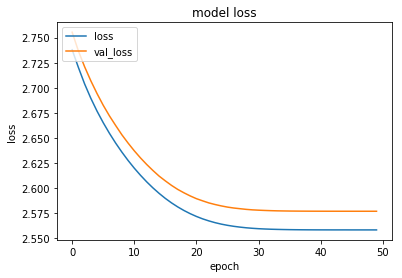

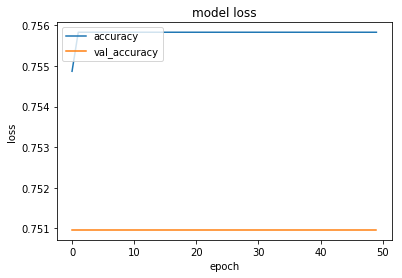

ES STEPS: 1 BEST SCORE: 0.7558 
ES STEPS: 2 BEST SCORE: 0.7558 
ES STEPS: 3 BEST SCORE: 0.7558 
ES STEPS: 4 BEST SCORE: 0.7558 
ES STEPS: 5 BEST SCORE: 0.7558 
ES STEPS: 6 BEST SCORE: 0.7558 
ES STEPS: 7 BEST SCORE: 0.7558 
ES STEPS: 8 BEST SCORE: 0.7558 
ES STEPS: 9 BEST SCORE: 0.7558 
ES STEPS: 10 BEST SCORE: 0.7558 
ES STEPS: 11 BEST SCORE: 0.7558 
ES STEPS: 12 BEST SCORE: 0.7558 
ES STEPS: 13 BEST SCORE: 0.7558 
ES STEPS: 14 BEST SCORE: 0.7558 
ES STEPS: 15 BEST SCORE: 0.7558 
ES STEPS: 16 BEST SCORE: 0.7558 
ES STEPS: 17 BEST SCORE: 0.7558 
ES STEPS: 18 BEST SCORE: 0.7566 
ES STEPS: 19 BEST SCORE: 0.7566 
ES STEPS: 20 BEST SCORE: 0.7566 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 38us/step - loss: 3.0398 - acc: 0.7566 - val_loss: 3.1322 - val_acc: 0.7462
Epoch 2/50
4157/4157 [==============================] - 0s 33us/step - loss: 3.0201 - acc: 0.7566 - val_loss: 3.1126 - val_acc: 0.7462
Epoch 3/5

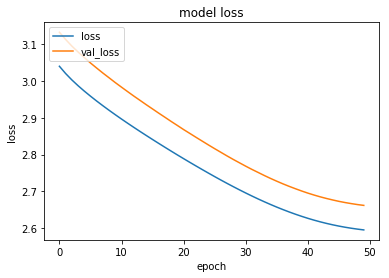

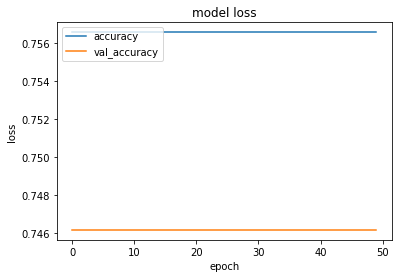

ES STEPS: 1 BEST SCORE: 0.7566 
ES STEPS: 2 BEST SCORE: 0.7566 
ES STEPS: 3 BEST SCORE: 0.7566 
ES STEPS: 4 BEST SCORE: 0.7566 
ES STEPS: 5 BEST SCORE: 0.7602 
ES STEPS: 6 BEST SCORE: 0.7602 
ES STEPS: 7 BEST SCORE: 0.7602 
ES STEPS: 8 BEST SCORE: 0.7602 
ES STEPS: 9 BEST SCORE: 0.7602 
ES STEPS: 10 BEST SCORE: 0.7602 
ES STEPS: 11 BEST SCORE: 0.7602 
ES STEPS: 12 BEST SCORE: 0.7602 
ES STEPS: 13 BEST SCORE: 0.7602 
ES STEPS: 14 BEST SCORE: 0.7602 
ES STEPS: 15 BEST SCORE: 0.7602 
ES STEPS: 16 BEST SCORE: 0.7602 
ES STEPS: 17 BEST SCORE: 0.7602 
ES STEPS: 18 BEST SCORE: 0.7602 
ES STEPS: 19 BEST SCORE: 0.7602 
ES STEPS: 20 BEST SCORE: 0.7602 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 3/5

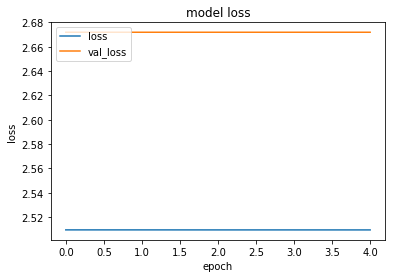

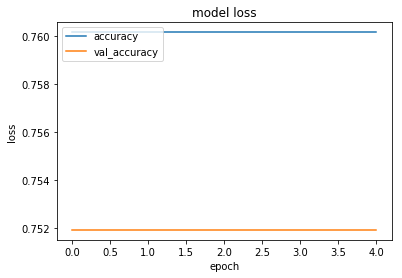

ES STEPS: 1 BEST SCORE: 0.7602 
ES STEPS: 2 BEST SCORE: 0.7602 
ES STEPS: 3 BEST SCORE: 0.7602 
ES STEPS: 4 BEST SCORE: 0.7602 
ES STEPS: 5 BEST SCORE: 0.7602 
ES STEPS: 6 BEST SCORE: 0.7602 
ES STEPS: 7 BEST SCORE: 0.7602 
ES STEPS: 8 BEST SCORE: 0.7602 
ES STEPS: 9 BEST SCORE: 0.7602 
ES STEPS: 10 BEST SCORE: 0.7602 
ES STEPS: 11 BEST SCORE: 0.7602 
ES STEPS: 12 BEST SCORE: 0.7602 
ES STEPS: 13 BEST SCORE: 0.7602 
ES STEPS: 14 BEST SCORE: 0.7602 
ES STEPS: 15 BEST SCORE: 0.7602 
ES STEPS: 16 BEST SCORE: 0.7602 
ES STEPS: 17 BEST SCORE: 0.7602 
ES STEPS: 18 BEST SCORE: 0.7602 
ES STEPS: 19 BEST SCORE: 0.7602 
ES STEPS: 20 BEST SCORE: 0.7602 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 33us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 3/5

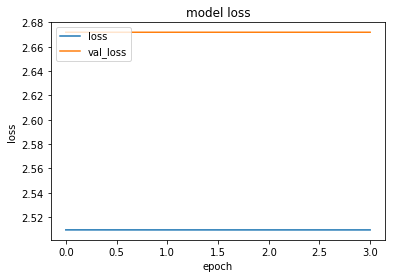

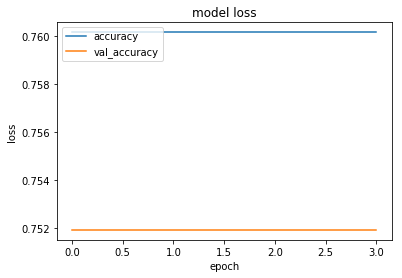

ES STEPS: 1 BEST SCORE: 0.7602 
ES STEPS: 2 BEST SCORE: 0.7602 
ES STEPS: 3 BEST SCORE: 0.7602 
ES STEPS: 4 BEST SCORE: 0.7602 
ES STEPS: 5 BEST SCORE: 0.7602 
ES STEPS: 6 BEST SCORE: 0.7602 
ES STEPS: 7 BEST SCORE: 0.7602 
ES STEPS: 8 BEST SCORE: 0.7602 
ES STEPS: 9 BEST SCORE: 0.7602 
ES STEPS: 10 BEST SCORE: 0.7602 
ES STEPS: 11 BEST SCORE: 0.7602 
ES STEPS: 12 BEST SCORE: 0.7602 
ES STEPS: 13 BEST SCORE: 0.7602 
ES STEPS: 14 BEST SCORE: 0.7602 
ES STEPS: 15 BEST SCORE: 0.7602 
ES STEPS: 16 BEST SCORE: 0.7602 
ES STEPS: 17 BEST SCORE: 0.7602 
ES STEPS: 18 BEST SCORE: 0.7602 
ES STEPS: 19 BEST SCORE: 0.7602 
ES STEPS: 20 BEST SCORE: 0.7602 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 3/5

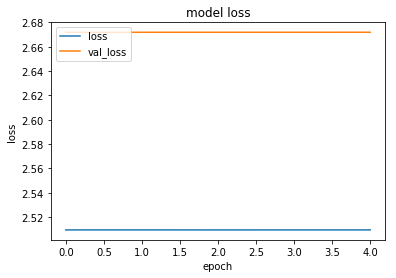

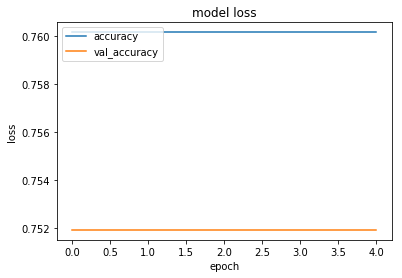

ES STEPS: 1 BEST SCORE: 0.7602 
ES STEPS: 2 BEST SCORE: 0.7602 
ES STEPS: 3 BEST SCORE: 0.7602 
ES STEPS: 4 BEST SCORE: 0.7602 
ES STEPS: 5 BEST SCORE: 0.7602 
ES STEPS: 6 BEST SCORE: 0.7602 
ES STEPS: 7 BEST SCORE: 0.7602 
ES STEPS: 8 BEST SCORE: 0.7602 
ES STEPS: 9 BEST SCORE: 0.7602 
ES STEPS: 10 BEST SCORE: 0.7602 
ES STEPS: 11 BEST SCORE: 0.7602 
ES STEPS: 12 BEST SCORE: 0.7602 
ES STEPS: 13 BEST SCORE: 0.7602 
ES STEPS: 14 BEST SCORE: 0.7602 
ES STEPS: 15 BEST SCORE: 0.7602 
ES STEPS: 16 BEST SCORE: 0.7602 
ES STEPS: 17 BEST SCORE: 0.7602 
ES STEPS: 18 BEST SCORE: 0.7602 
ES STEPS: 19 BEST SCORE: 0.7602 
ES STEPS: 20 BEST SCORE: 0.7602 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 33us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 3/5

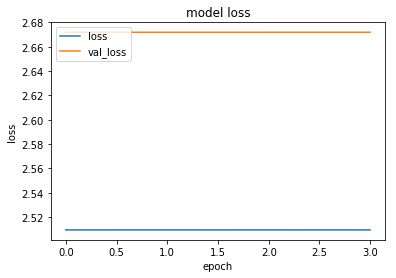

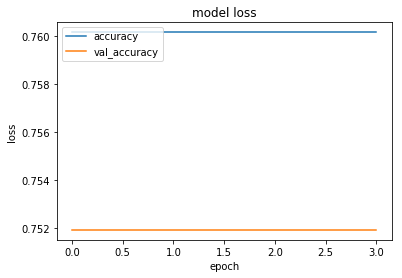

ES STEPS: 1 BEST SCORE: 0.7602 
ES STEPS: 2 BEST SCORE: 0.7602 
ES STEPS: 3 BEST SCORE: 0.7602 
ES STEPS: 4 BEST SCORE: 0.7602 
ES STEPS: 5 BEST SCORE: 0.7602 
ES STEPS: 6 BEST SCORE: 0.7602 
ES STEPS: 7 BEST SCORE: 0.7602 
ES STEPS: 8 BEST SCORE: 0.7602 
ES STEPS: 9 BEST SCORE: 0.7602 
ES STEPS: 10 BEST SCORE: 0.7602 
ES STEPS: 11 BEST SCORE: 0.7602 
ES STEPS: 12 BEST SCORE: 0.7602 
ES STEPS: 13 BEST SCORE: 0.7602 
ES STEPS: 14 BEST SCORE: 0.7602 
ES STEPS: 15 BEST SCORE: 0.7602 
ES STEPS: 16 BEST SCORE: 0.7602 
ES STEPS: 17 BEST SCORE: 0.7602 
ES STEPS: 18 BEST SCORE: 0.7602 
ES STEPS: 19 BEST SCORE: 0.7602 
ES STEPS: 20 BEST SCORE: 0.7602 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.5094 - acc: 0.7602 - val_loss: 2.6719 - val_acc: 0.7519
Epoch 3/5

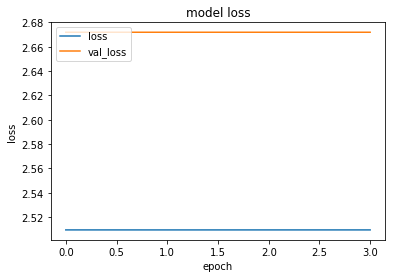

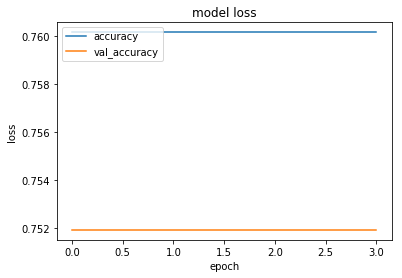

ES STEPS: 1 BEST SCORE: 0.7602 
ES STEPS: 2 BEST SCORE: 0.7602 
ES STEPS: 3 BEST SCORE: 0.7602 
ES STEPS: 4 BEST SCORE: 0.7602 
ES STEPS: 5 BEST SCORE: 0.7602 
ES STEPS: 6 BEST SCORE: 0.7602 
ES STEPS: 7 BEST SCORE: 0.7602 
ES STEPS: 8 BEST SCORE: 0.7602 
ES STEPS: 9 BEST SCORE: 0.7602 
ES STEPS: 10 BEST SCORE: 0.7602 
ES STEPS: 11 BEST SCORE: 0.7602 
ES STEPS: 12 BEST SCORE: 0.7602 
ES STEPS: 13 BEST SCORE: 0.7602 
ES STEPS: 14 BEST SCORE: 0.7602 
ES STEPS: 15 BEST SCORE: 0.7602 
ES STEPS: 16 BEST SCORE: 0.7602 
ES STEPS: 17 BEST SCORE: 0.7602 
ES STEPS: 18 BEST SCORE: 0.7602 
ES STEPS: 19 BEST SCORE: 0.7602 
ES STEPS: 20 BEST SCORE: 0.7602 
Stop: Reach max_steps
Our accuracy is 74.54%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

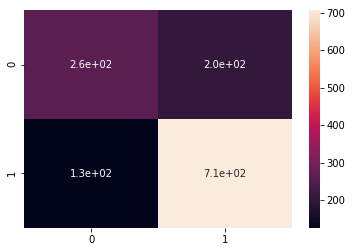

In [35]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  model, weights = ModelFit(model=model, weights=weights, epochs=50)

  # ES
  weights, ES_Optimized_ObjVal, _, _ = MyES.run(weights, max_steps=20, verbose = 1)
    
  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 5:
      break
    
Performance(model)

## 版本2：ParentsSize = #param x2, ChildSize = ParentsSize*7

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1 BEST SCORE: 0.6955 
ES STEPS: 2 BEST SCORE: 0.6955 
ES STEPS: 3 BEST SCORE: 0.6976 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 1s 143us/step - loss: 4.3721 - acc: 0.6974 - val_loss:

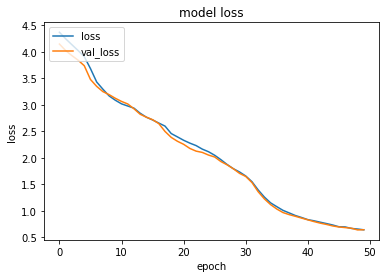

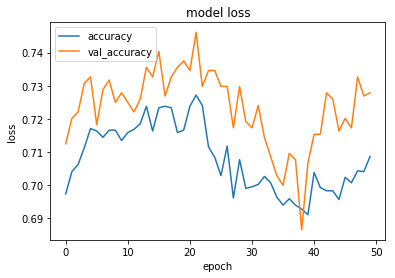

ES STEPS: 1 BEST SCORE: 0.7207 
ES STEPS: 2 BEST SCORE: 0.7270 
ES STEPS: 3 BEST SCORE: 0.7270 
ES STEPS: 4 BEST SCORE: 0.7270 
ES STEPS: 5 BEST SCORE: 0.7270 
ES STEPS: 6 BEST SCORE: 0.7270 
ES STEPS: 7 BEST SCORE: 0.7270 
ES STEPS: 8 BEST SCORE: 0.7279 
ES STEPS: 9 BEST SCORE: 0.7279 
ES STEPS: 10 BEST SCORE: 0.7279 
ES STEPS: 11 BEST SCORE: 0.7354 
ES STEPS: 12 BEST SCORE: 0.7354 
ES STEPS: 13 BEST SCORE: 0.7400 
ES STEPS: 14 BEST SCORE: 0.7400 
ES STEPS: 15 BEST SCORE: 0.7400 
ES STEPS: 16 BEST SCORE: 0.7400 
ES STEPS: 17 BEST SCORE: 0.7400 
ES STEPS: 18 BEST SCORE: 0.7400 
ES STEPS: 19 BEST SCORE: 0.7412 
ES STEPS: 20 BEST SCORE: 0.7431 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.1187 - acc: 0.7428 - val_loss: 4.1587 - val_acc: 0.7404
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.1187 - acc: 0.7428 - val_loss: 4.1587 - val_acc: 0.7404
Epoch 3/5

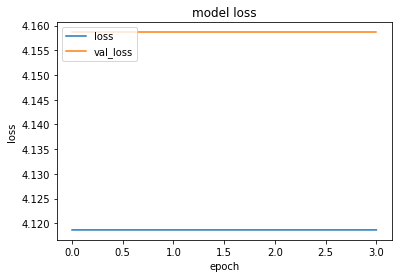

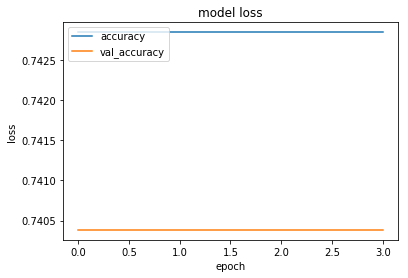

ES STEPS: 1 BEST SCORE: 0.7472 
ES STEPS: 2 BEST SCORE: 0.7493 
ES STEPS: 3 BEST SCORE: 0.7517 
ES STEPS: 4 BEST SCORE: 0.7529 
ES STEPS: 5 BEST SCORE: 0.7529 
ES STEPS: 6 BEST SCORE: 0.7529 
ES STEPS: 7 BEST SCORE: 0.7529 
ES STEPS: 8 BEST SCORE: 0.7529 
ES STEPS: 9 BEST SCORE: 0.7529 
ES STEPS: 10 BEST SCORE: 0.7529 
ES STEPS: 11 BEST SCORE: 0.7529 
ES STEPS: 12 BEST SCORE: 0.7529 
ES STEPS: 13 BEST SCORE: 0.7529 
ES STEPS: 14 BEST SCORE: 0.7532 
ES STEPS: 15 BEST SCORE: 0.7532 
ES STEPS: 16 BEST SCORE: 0.7532 
ES STEPS: 17 BEST SCORE: 0.7534 
ES STEPS: 18 BEST SCORE: 0.7551 
ES STEPS: 19 BEST SCORE: 0.7551 
ES STEPS: 20 BEST SCORE: 0.7563 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 34us/step - loss: 3.8536 - acc: 0.7563 - val_loss: 4.0629 - val_acc: 0.7433
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.8536 - acc: 0.7563 - val_loss: 4.0629 - val_acc: 0.7433
Epoch 3/5

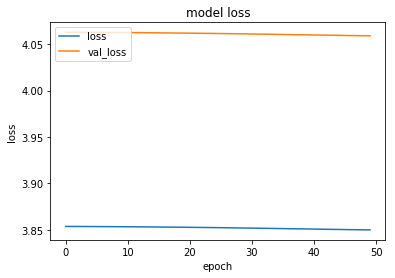

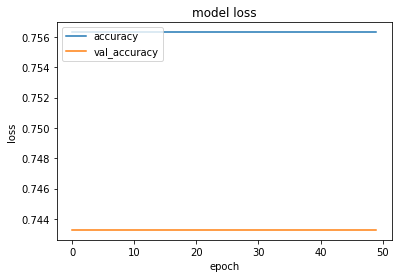

ES STEPS: 1 BEST SCORE: 0.7582 
ES STEPS: 2 BEST SCORE: 0.7582 
ES STEPS: 3 BEST SCORE: 0.7582 
ES STEPS: 4 BEST SCORE: 0.7582 
ES STEPS: 5 BEST SCORE: 0.7582 
ES STEPS: 6 BEST SCORE: 0.7582 
ES STEPS: 7 BEST SCORE: 0.7582 
ES STEPS: 8 BEST SCORE: 0.7587 
ES STEPS: 9 BEST SCORE: 0.7587 
ES STEPS: 10 BEST SCORE: 0.7587 


KeyboardInterrupt: 

In [36]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = model.count_params()*2, ChildSize = model.count_params()*2*7, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  model, weights = ModelFit(model=model, weights=weights, epochs=50)

  # ES
  weights, ES_Optimized_ObjVal,_,_ = MyES.run(weights, max_steps=20, verbose = 1)

  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break
    
# Gradient-based Optimize
model, weights = ModelFit(model=model, weights=weights)    

Performance(model)

## 版本3：ParentsSize = 15, ChildSize = 100 With MultiPhase

Our accuracy is 75.15%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

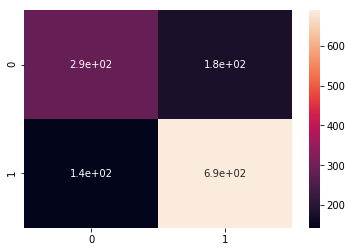

In [41]:
Performance(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1 BEST SCORE: 0.6572 
ES STEPS: 2 BEST SCORE: 0.6620 
ES STEPS: 3 BEST SCORE: 0.6620 
Stop: Reach max_steps
====================== 0 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 1s 140us/step - loss: 3

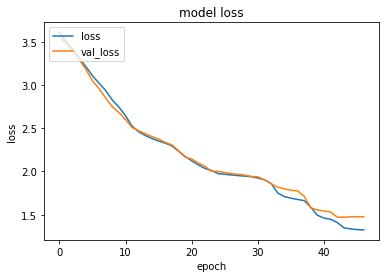

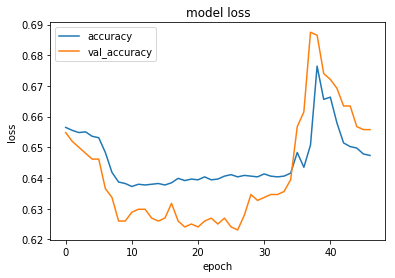

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 5.7547 - acc: 0.6348 - val_loss: 5.8928 - val_acc: 0.6260
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.7426 - acc: 0.6360 - val_loss: 5.8928 - val_acc: 0.6260
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.7600 - acc: 0.6348 - val_loss: 5.9080 - val_acc: 0.6250
Epoch 4/50
4157/4157 [==============================] - 0s 35us/step - loss: 5.7582 - acc: 0.6358 - val_loss: 5.9047 - val_acc: 0.6250
Epoch 5/50
4157/4157 [==============================] - 0s 32us/step - loss: 5.7423 - acc: 0.6360 - val_loss: 5.9032 - val_acc: 0.6260
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


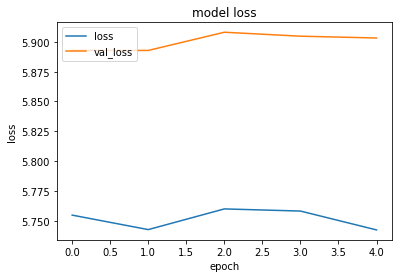

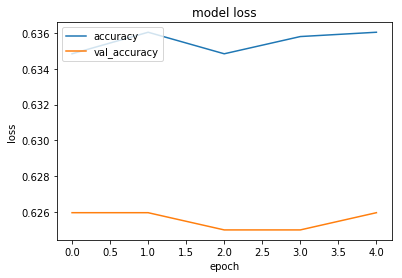

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 33us/step - loss: 5.8185 - acc: 0.6344 - val_loss: 5.9764 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 5.8236 - acc: 0.6346 - val_loss: 5.9399 - val_acc: 0.6250
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 5.8264 - acc: 0.6317 - val_loss: 6.0087 - val_acc: 0.6212
Epoch 4/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.7976 - acc: 0.6336 - val_loss: 5.9907 - val_acc: 0.6231
Epoch 5/50
4157/4157 [==============================] - 0s 32us/step - loss: 5.7735 - acc: 0.6334 - val_loss: 5.8500 - val_acc: 0.6308
Epoch 6/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.6904 - acc: 0.6413 - val_loss: 5.7690 - val_acc: 0.6337
Epoch 7/50
4157/4157 [==============================] - 0s 30us/step - loss: 5.5936 - acc: 0.6452 - val_loss: 5

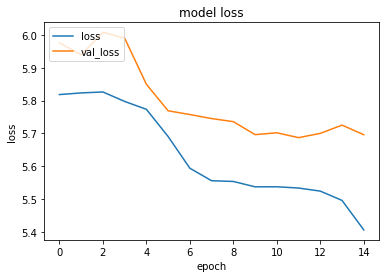

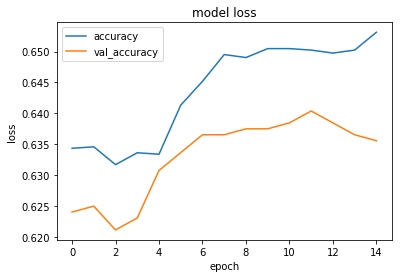

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 5.8324 - acc: 0.6341 - val_loss: 5.9784 - val_acc: 0.6250
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.8319 - acc: 0.6341 - val_loss: 5.9784 - val_acc: 0.6250
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.8297 - acc: 0.6341 - val_loss: 5.9784 - val_acc: 0.6250
Epoch 4/50
4157/4157 [==============================] - 0s 33us/step - loss: 5.8293 - acc: 0.6344 - val_loss: 5.9784 - val_acc: 0.6250
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


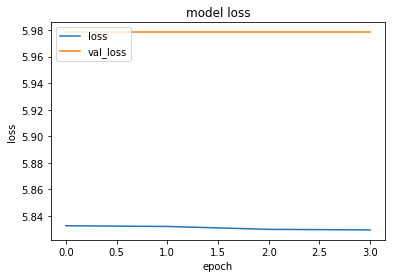

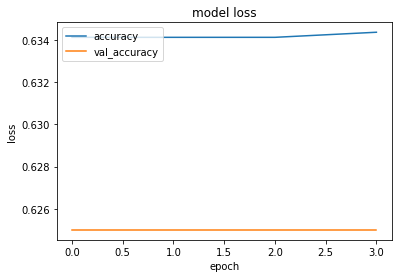

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 1.1502 - acc: 0.6334 - val_loss: 1.1147 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 33us/step - loss: 1.0371 - acc: 0.6336 - val_loss: 1.0272 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 0.9656 - acc: 0.6339 - val_loss: 0.9644 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 0.9119 - acc: 0.6339 - val_loss: 0.9145 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 30us/step - loss: 0.8686 - acc: 0.6339 - val_loss: 0.8742 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 29us/step - loss: 0.8330 - acc: 0.6339 - val_loss: 0.8403 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 30us/step - loss: 0.8033 - acc: 0.6339 - val_loss: 0

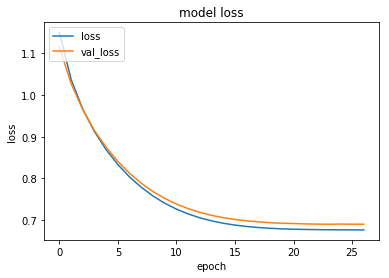

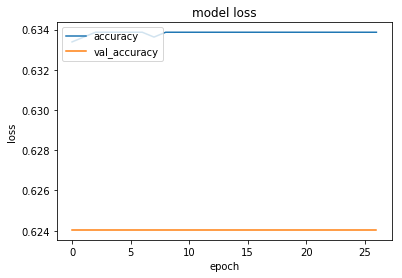

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.6605 - acc: 0.6331 - val_loss: 2.4135 - val_acc: 0.6433
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 2.4332 - acc: 0.6327 - val_loss: 2.2583 - val_acc: 0.6462
Epoch 3/50
4157/4157 [==============================] - 0s 34us/step - loss: 2.3263 - acc: 0.6303 - val_loss: 2.1395 - val_acc: 0.6481
Epoch 4/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.1794 - acc: 0.6312 - val_loss: 2.0431 - val_acc: 0.6519
Epoch 5/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.1428 - acc: 0.6327 - val_loss: 2.0373 - val_acc: 0.6500
Epoch 6/50
4157/4157 [==============================] - 0s 34us/step - loss: 2.1065 - acc: 0.6336 - val_loss: 1.9924 - val_acc: 0.6471
Epoch 7/50
4157/4157 [==============================] - 0s 33us/step - loss: 2.0547 - acc: 0.6327 - val_loss: 1

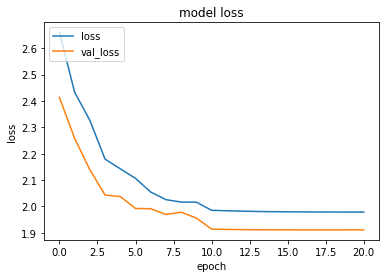

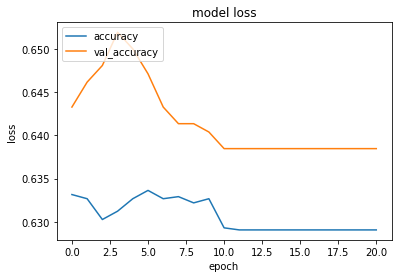

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.7403 - acc: 0.6312 - val_loss: 5.5206 - val_acc: 0.6087
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.7451 - acc: 0.6093 - val_loss: 4.5385 - val_acc: 0.5894
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.1384 - acc: 0.5879 - val_loss: 4.0696 - val_acc: 0.5750
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.7740 - acc: 0.5834 - val_loss: 3.7830 - val_acc: 0.5769
Epoch 5/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.1797 - acc: 0.5761 - val_loss: 2.5178 - val_acc: 0.5663
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.3205 - acc: 0.5682 - val_loss: 2.3589 - val_acc: 0.5692
Epoch 7/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.2307 - acc: 0.5699 - val_loss: 2

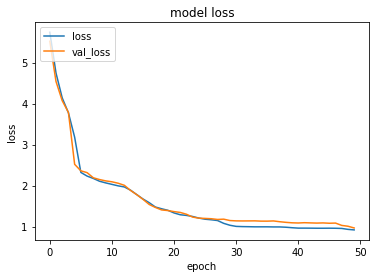

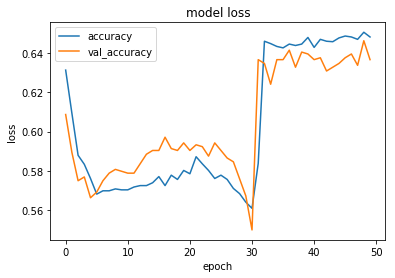

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.1318 - acc: 0.6331 - val_loss: 3.9755 - val_acc: 0.6221
Epoch 2/50
4157/4157 [==============================] - 0s 34us/step - loss: 3.7224 - acc: 0.6334 - val_loss: 3.5916 - val_acc: 0.6221
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.4385 - acc: 0.6319 - val_loss: 3.2620 - val_acc: 0.6183
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.1893 - acc: 0.6300 - val_loss: 3.0992 - val_acc: 0.6163
Epoch 5/50
4157/4157 [==============================] - 0s 29us/step - loss: 3.0100 - acc: 0.6312 - val_loss: 2.8946 - val_acc: 0.6202
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.8968 - acc: 0.6329 - val_loss: 2.8002 - val_acc: 0.6183
Epoch 7/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.8043 - acc: 0.6329 - val_loss: 2

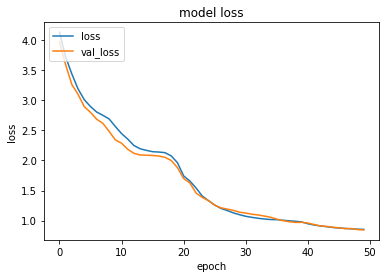

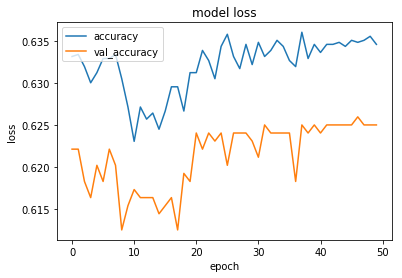

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 5.8485 - acc: 0.6331 - val_loss: 5.9937 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 32us/step - loss: 5.8485 - acc: 0.6331 - val_loss: 5.9937 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 5.8485 - acc: 0.6331 - val_loss: 5.9937 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 5.8485 - acc: 0.6331 - val_loss: 5.9937 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


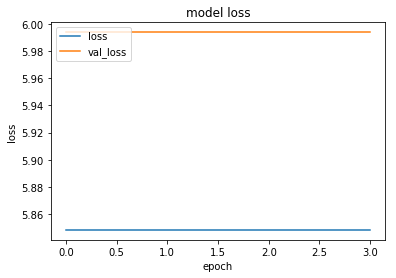

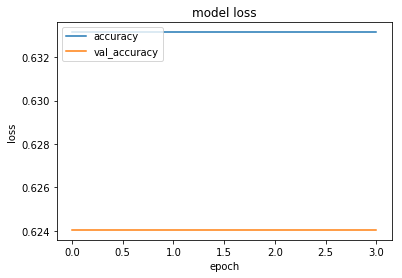

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 5.8485 - acc: 0.6331 - val_loss: 5.9937 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.8485 - acc: 0.6331 - val_loss: 5.9937 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 5.8485 - acc: 0.6331 - val_loss: 5.9937 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 5.8485 - acc: 0.6331 - val_loss: 5.9937 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


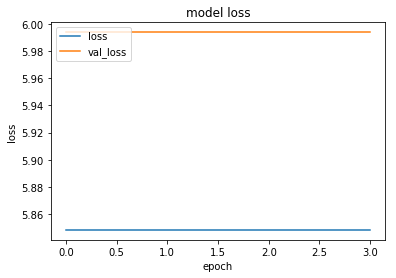

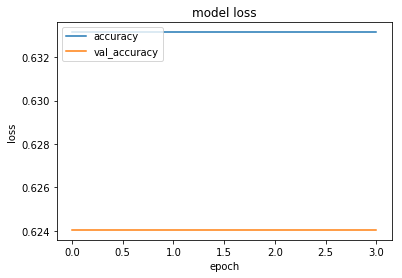

ES STEPS: 1 BEST SCORE: 0.6899 
ES STEPS: 2 BEST SCORE: 0.6899 
ES STEPS: 3 BEST SCORE: 0.6899 
ES STEPS: 4 BEST SCORE: 0.6899 
ES STEPS: 5 BEST SCORE: 0.6899 
ES STEPS: 6 BEST SCORE: 0.6909 
ES STEPS: 7 BEST SCORE: 0.6981 
ES STEPS: 8 BEST SCORE: 0.7017 
ES STEPS: 9 BEST SCORE: 0.7111 
ES STEPS: 10 BEST SCORE: 0.7284 
ES STEPS: 11 BEST SCORE: 0.7284 
ES STEPS: 12 BEST SCORE: 0.7332 
ES STEPS: 13 BEST SCORE: 0.7443 
ES STEPS: 14 BEST SCORE: 0.7443 
ES STEPS: 15 BEST SCORE: 0.7452 
ES STEPS: 16 BEST SCORE: 0.7452 
ES STEPS: 17 BEST SCORE: 0.7452 
ES STEPS: 18 BEST SCORE: 0.7452 
ES STEPS: 19 BEST SCORE: 0.7452 
ES STEPS: 20 BEST SCORE: 0.7452 
Stop: Reach max_steps
====================== 0 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.2001 - acc: 0.7373 - val_loss: 4.0623 - val_acc: 0.7462
Epoch 2/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.2140 - acc: 0.7366 - val_loss: 4.0

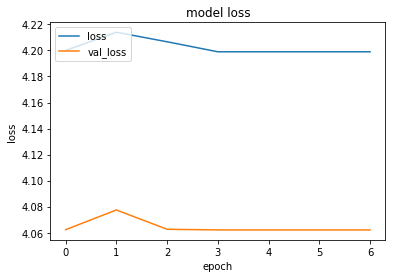

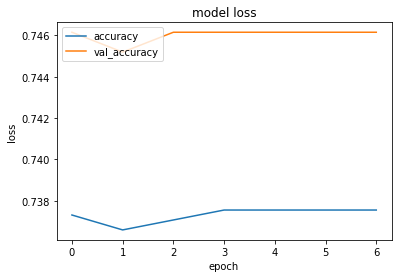

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.2768 - acc: 0.7332 - val_loss: 4.0387 - val_acc: 0.7481
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2768 - acc: 0.7332 - val_loss: 4.0387 - val_acc: 0.7481
Epoch 3/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.2768 - acc: 0.7332 - val_loss: 4.0387 - val_acc: 0.7481
Epoch 4/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.2768 - acc: 0.7332 - val_loss: 4.0387 - val_acc: 0.7481
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


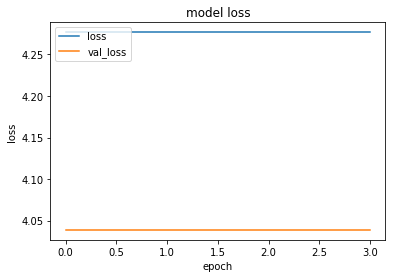

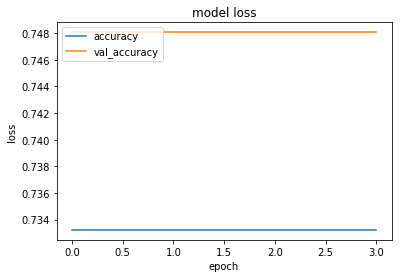

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.2675 - acc: 0.7330 - val_loss: 4.2113 - val_acc: 0.7365
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2662 - acc: 0.7332 - val_loss: 4.2113 - val_acc: 0.7365
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2662 - acc: 0.7332 - val_loss: 4.2113 - val_acc: 0.7365
Epoch 4/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.2662 - acc: 0.7332 - val_loss: 4.2113 - val_acc: 0.7365
Epoch 5/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.2662 - acc: 0.7332 - val_loss: 4.2113 - val_acc: 0.7365
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


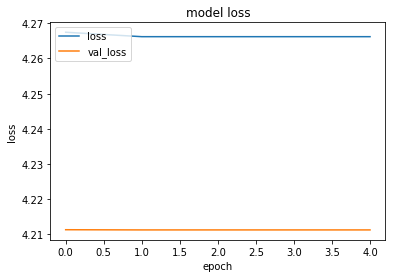

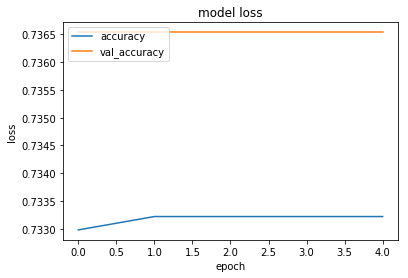

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.3041 - acc: 0.7306 - val_loss: 4.4275 - val_acc: 0.7231
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.2969 - acc: 0.7311 - val_loss: 4.4525 - val_acc: 0.7212
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2959 - acc: 0.7313 - val_loss: 4.4525 - val_acc: 0.7212
Epoch 4/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.2959 - acc: 0.7313 - val_loss: 4.4525 - val_acc: 0.7212
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


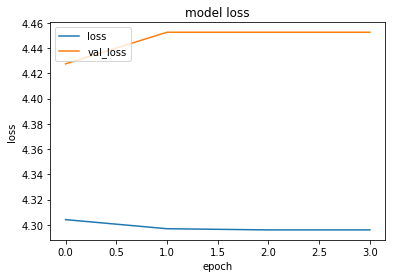

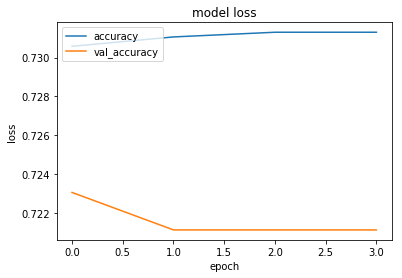

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.6918 - acc: 0.7296 - val_loss: 3.7428 - val_acc: 0.7308
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.6720 - acc: 0.7315 - val_loss: 3.7288 - val_acc: 0.7308
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.6597 - acc: 0.7325 - val_loss: 3.7279 - val_acc: 0.7308
Epoch 4/50
4157/4157 [==============================] - 0s 29us/step - loss: 3.6461 - acc: 0.7327 - val_loss: 3.7215 - val_acc: 0.7279
Epoch 5/50
4157/4157 [==============================] - 0s 29us/step - loss: 3.6463 - acc: 0.7327 - val_loss: 3.7175 - val_acc: 0.7308
Epoch 6/50
4157/4157 [==============================] - 0s 29us/step - loss: 3.6431 - acc: 0.7335 - val_loss: 3.7128 - val_acc: 0.7317
Epoch 7/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.6440 - acc: 0.7332 - val_loss: 3

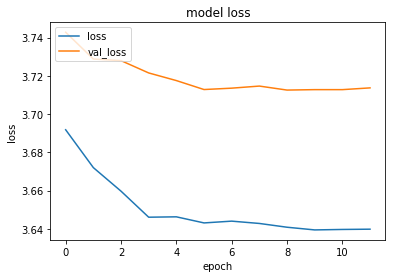

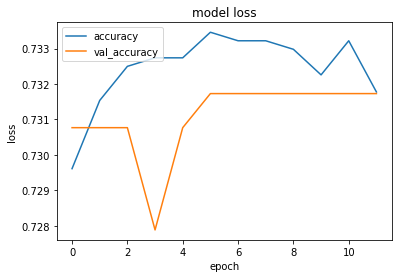

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3282 - acc: 0.7294 - val_loss: 4.2907 - val_acc: 0.7317
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3282 - acc: 0.7294 - val_loss: 4.2907 - val_acc: 0.7317
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3282 - acc: 0.7294 - val_loss: 4.2907 - val_acc: 0.7317
Epoch 4/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3282 - acc: 0.7294 - val_loss: 4.2907 - val_acc: 0.7317
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


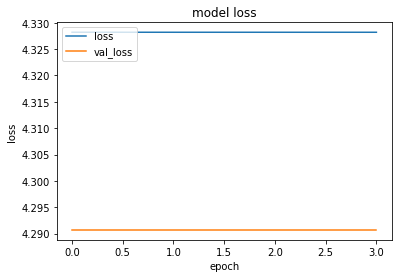

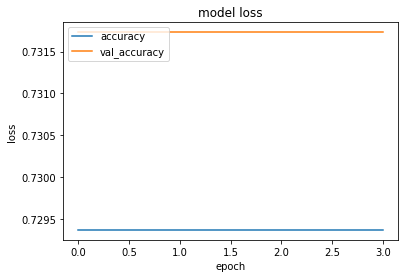

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.3346 - acc: 0.7291 - val_loss: 4.2173 - val_acc: 0.7365
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3346 - acc: 0.7291 - val_loss: 4.2173 - val_acc: 0.7365
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3346 - acc: 0.7291 - val_loss: 4.2173 - val_acc: 0.7365
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.3346 - acc: 0.7291 - val_loss: 4.2173 - val_acc: 0.7365
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


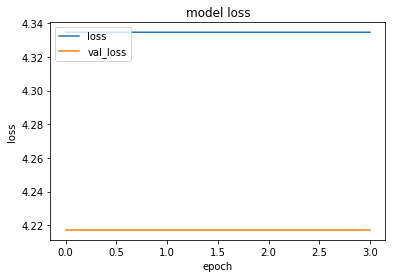

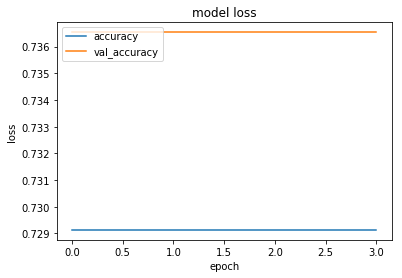

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3031 - acc: 0.7279 - val_loss: 3.9607 - val_acc: 0.7481
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.2993 - acc: 0.7277 - val_loss: 3.9753 - val_acc: 0.7471
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2964 - acc: 0.7279 - val_loss: 3.9747 - val_acc: 0.7471
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2932 - acc: 0.7279 - val_loss: 3.9591 - val_acc: 0.7471
Epoch 5/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2889 - acc: 0.7279 - val_loss: 3.9533 - val_acc: 0.7481
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2851 - acc: 0.7279 - val_loss: 3.9580 - val_acc: 0.7481
Epoch 7/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.2781 - acc: 0.7277 - val_loss: 3

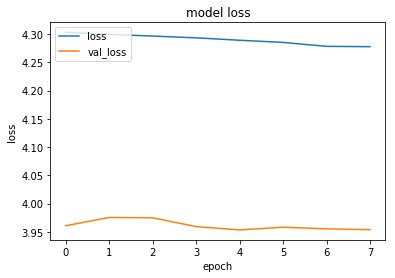

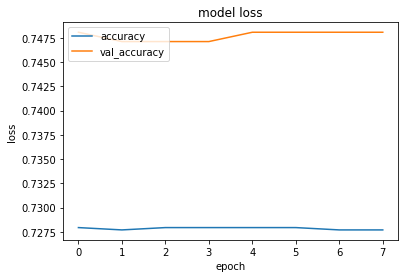

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.1380 - acc: 0.7287 - val_loss: 4.2064 - val_acc: 0.7298
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1350 - acc: 0.7289 - val_loss: 4.1690 - val_acc: 0.7298
Epoch 3/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.1217 - acc: 0.7294 - val_loss: 4.1749 - val_acc: 0.7288
Epoch 4/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.1282 - acc: 0.7291 - val_loss: 4.2010 - val_acc: 0.7279
Epoch 5/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1128 - acc: 0.7294 - val_loss: 4.2038 - val_acc: 0.7279
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


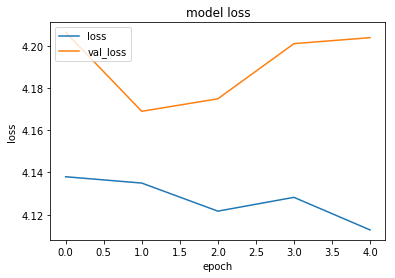

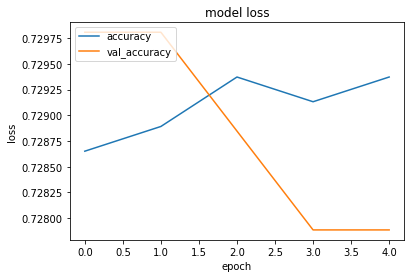

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.3661 - acc: 0.7260 - val_loss: 4.4493 - val_acc: 0.7212
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3661 - acc: 0.7260 - val_loss: 4.4492 - val_acc: 0.7212
Epoch 3/50
4157/4157 [==============================] - 0s 33us/step - loss: 4.3660 - acc: 0.7260 - val_loss: 4.4492 - val_acc: 0.7212
Epoch 4/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.3660 - acc: 0.7260 - val_loss: 4.4492 - val_acc: 0.7212
Epoch 5/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.3660 - acc: 0.7260 - val_loss: 4.4492 - val_acc: 0.7212
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.3660 - acc: 0.7260 - val_loss: 4.4492 - val_acc: 0.7212
Epoch 7/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.3659 - acc: 0.7260 - val_loss: 4

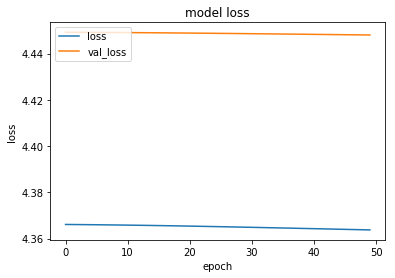

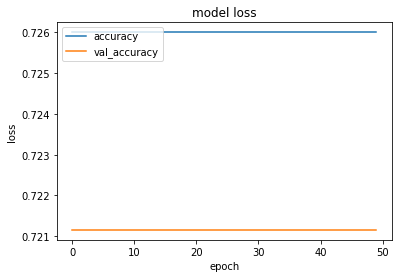

ES STEPS: 1 BEST SCORE: 0.7416 
ES STEPS: 2 BEST SCORE: 0.7438 
ES STEPS: 3 BEST SCORE: 0.7450 
ES STEPS: 4 BEST SCORE: 0.7508 
ES STEPS: 5 BEST SCORE: 0.7508 
ES STEPS: 6 BEST SCORE: 0.7508 
ES STEPS: 7 BEST SCORE: 0.7508 
ES STEPS: 8 BEST SCORE: 0.7508 
ES STEPS: 9 BEST SCORE: 0.7508 
ES STEPS: 10 BEST SCORE: 0.7508 
ES STEPS: 11 BEST SCORE: 0.7508 
ES STEPS: 12 BEST SCORE: 0.7508 
ES STEPS: 13 BEST SCORE: 0.7508 
ES STEPS: 14 BEST SCORE: 0.7529 
ES STEPS: 15 BEST SCORE: 0.7534 
ES STEPS: 16 BEST SCORE: 0.7539 
ES STEPS: 17 BEST SCORE: 0.7539 
ES STEPS: 18 BEST SCORE: 0.7539 
ES STEPS: 19 BEST SCORE: 0.7539 
ES STEPS: 20 BEST SCORE: 0.7539 
Stop: Reach max_steps
====================== 0 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 33us/step - loss: 2.8271 - acc: 0.7479 - val_loss: 2.8738 - val_acc: 0.7394
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 2.8093 - acc: 0.7479 - val_loss: 2.8

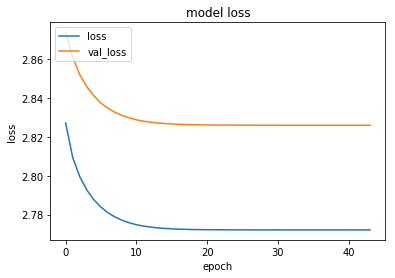

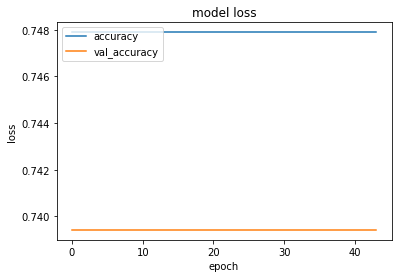

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0773 - acc: 0.7450 - val_loss: 4.1831 - val_acc: 0.7385
Epoch 2/50
4157/4157 [==============================] - 0s 34us/step - loss: 4.0773 - acc: 0.7450 - val_loss: 4.1831 - val_acc: 0.7385
Epoch 3/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0773 - acc: 0.7450 - val_loss: 4.1831 - val_acc: 0.7385
Epoch 4/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.0773 - acc: 0.7450 - val_loss: 4.1831 - val_acc: 0.7385
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


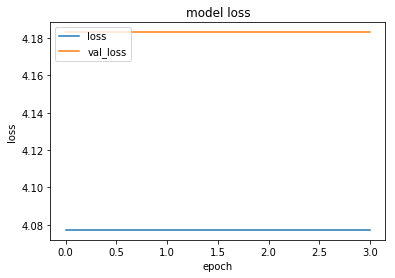

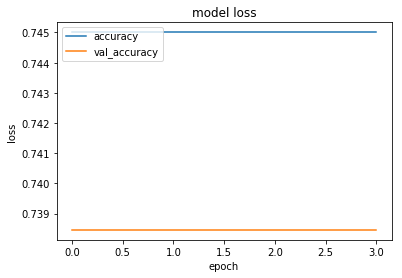

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 34us/step - loss: 4.0929 - acc: 0.7440 - val_loss: 4.4138 - val_acc: 0.7240
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.0929 - acc: 0.7440 - val_loss: 4.4138 - val_acc: 0.7240
Epoch 3/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.0929 - acc: 0.7440 - val_loss: 4.4138 - val_acc: 0.7240
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0929 - acc: 0.7440 - val_loss: 4.4138 - val_acc: 0.7240
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


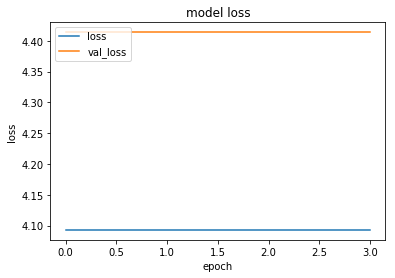

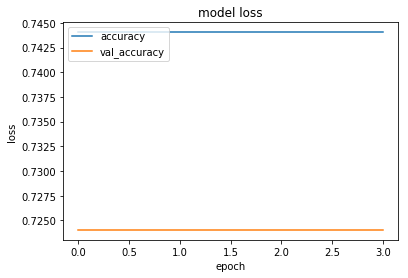

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.1071 - acc: 0.7433 - val_loss: 4.1405 - val_acc: 0.7413
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1071 - acc: 0.7433 - val_loss: 4.1405 - val_acc: 0.7413
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.1071 - acc: 0.7433 - val_loss: 4.1405 - val_acc: 0.7413
Epoch 4/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.1071 - acc: 0.7433 - val_loss: 4.1405 - val_acc: 0.7413
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


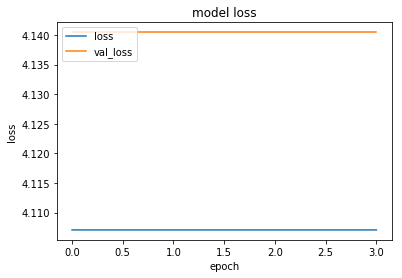

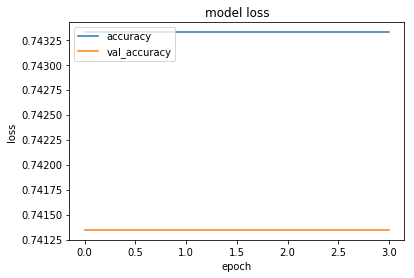

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.1100 - acc: 0.7433 - val_loss: 4.0347 - val_acc: 0.7481
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1100 - acc: 0.7433 - val_loss: 4.0347 - val_acc: 0.7481
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1100 - acc: 0.7433 - val_loss: 4.0347 - val_acc: 0.7481
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1100 - acc: 0.7433 - val_loss: 4.0347 - val_acc: 0.7481
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


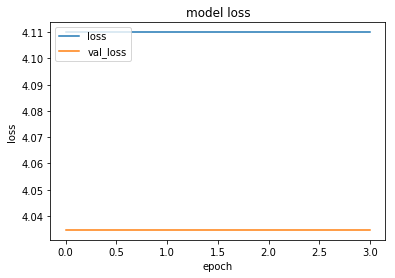

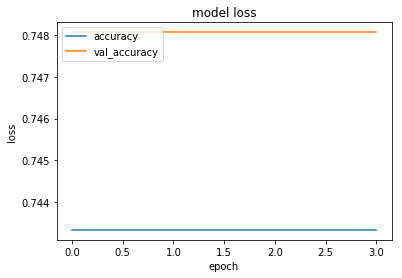

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.1275 - acc: 0.7419 - val_loss: 3.9565 - val_acc: 0.7529
Epoch 2/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.1211 - acc: 0.7426 - val_loss: 3.9565 - val_acc: 0.7529
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1211 - acc: 0.7426 - val_loss: 3.9565 - val_acc: 0.7529
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1211 - acc: 0.7426 - val_loss: 3.9565 - val_acc: 0.7529
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


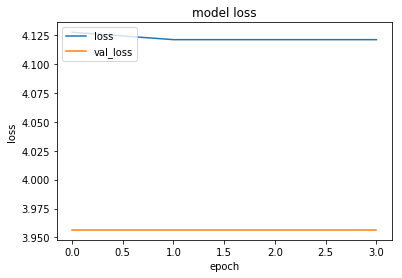

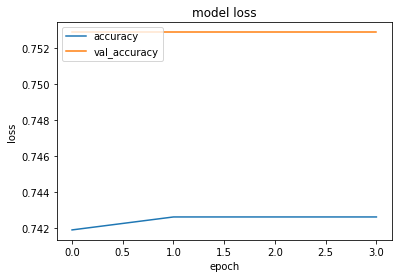

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.1868 - acc: 0.7388 - val_loss: 4.0820 - val_acc: 0.7452
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.1868 - acc: 0.7388 - val_loss: 4.0820 - val_acc: 0.7452
Epoch 3/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.1868 - acc: 0.7388 - val_loss: 4.0820 - val_acc: 0.7452
Epoch 4/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.1868 - acc: 0.7388 - val_loss: 4.0820 - val_acc: 0.7452
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


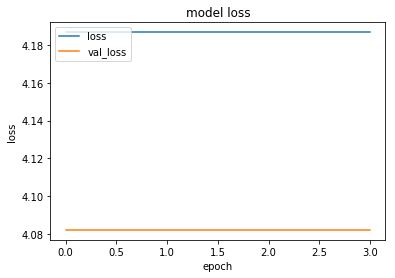

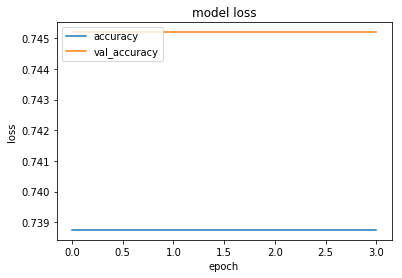

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 3.8823 - acc: 0.7385 - val_loss: 3.8827 - val_acc: 0.7404
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8846 - acc: 0.7383 - val_loss: 3.8260 - val_acc: 0.7442
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8591 - acc: 0.7400 - val_loss: 3.7761 - val_acc: 0.7452
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8457 - acc: 0.7400 - val_loss: 3.7734 - val_acc: 0.7452
Epoch 5/50
4157/4157 [==============================] - 0s 29us/step - loss: 3.8430 - acc: 0.7400 - val_loss: 3.7710 - val_acc: 0.7452
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8406 - acc: 0.7400 - val_loss: 3.7688 - val_acc: 0.7452
Epoch 7/50
4157/4157 [==============================] - 0s 33us/step - loss: 3.8385 - acc: 0.7400 - val_loss: 3

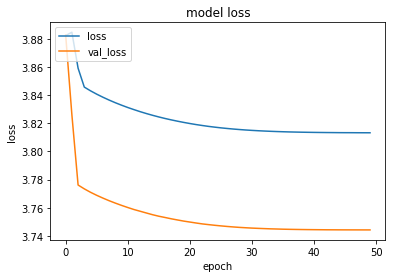

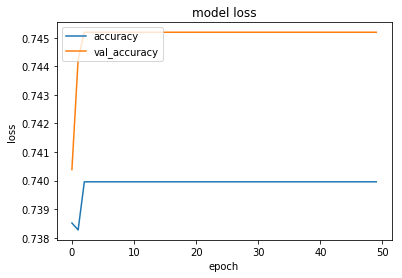

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 3.9498 - acc: 0.7380 - val_loss: 3.8961 - val_acc: 0.7433
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.9491 - acc: 0.7380 - val_loss: 3.8955 - val_acc: 0.7433
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.9484 - acc: 0.7380 - val_loss: 3.8949 - val_acc: 0.7433
Epoch 4/50
4157/4157 [==============================] - 0s 33us/step - loss: 3.9478 - acc: 0.7380 - val_loss: 3.8943 - val_acc: 0.7433
Epoch 5/50
4157/4157 [==============================] - 0s 29us/step - loss: 3.9472 - acc: 0.7380 - val_loss: 3.8938 - val_acc: 0.7433
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.9467 - acc: 0.7380 - val_loss: 3.8933 - val_acc: 0.7433
Epoch 7/50
4157/4157 [==============================] - 0s 32us/step - loss: 3.9461 - acc: 0.7380 - val_loss: 3

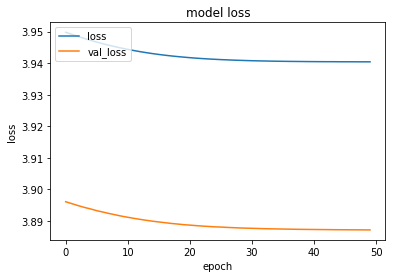

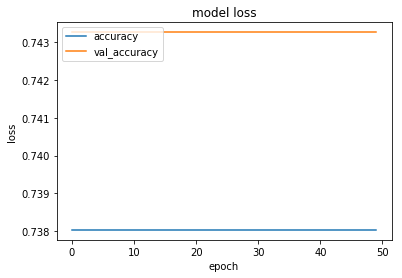

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.2053 - acc: 0.7366 - val_loss: 4.0443 - val_acc: 0.7471
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2006 - acc: 0.7368 - val_loss: 4.0291 - val_acc: 0.7481
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2044 - acc: 0.7371 - val_loss: 4.0291 - val_acc: 0.7481
Epoch 4/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.2006 - acc: 0.7373 - val_loss: 4.0291 - val_acc: 0.7481
Epoch 5/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.2006 - acc: 0.7373 - val_loss: 4.0291 - val_acc: 0.7481
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


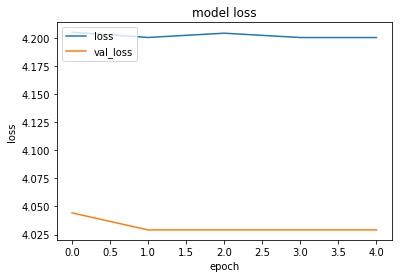

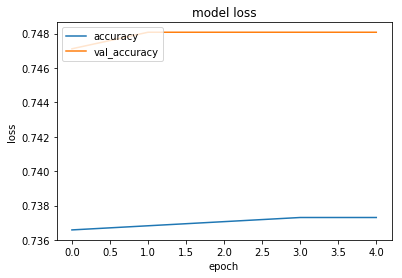

ES STEPS: 1 BEST SCORE: 0.7496 
ES STEPS: 2 BEST SCORE: 0.7515 
ES STEPS: 3 BEST SCORE: 0.7517 
ES STEPS: 4 BEST SCORE: 0.7539 
ES STEPS: 5 BEST SCORE: 0.7539 
ES STEPS: 6 BEST SCORE: 0.7539 
ES STEPS: 7 BEST SCORE: 0.7539 
ES STEPS: 8 BEST SCORE: 0.7539 
ES STEPS: 9 BEST SCORE: 0.7539 
ES STEPS: 10 BEST SCORE: 0.7539 
ES STEPS: 11 BEST SCORE: 0.7539 
ES STEPS: 12 BEST SCORE: 0.7539 
ES STEPS: 13 BEST SCORE: 0.7539 
ES STEPS: 14 BEST SCORE: 0.7539 
ES STEPS: 15 BEST SCORE: 0.7539 
ES STEPS: 16 BEST SCORE: 0.7539 
ES STEPS: 17 BEST SCORE: 0.7539 
ES STEPS: 18 BEST SCORE: 0.7541 
ES STEPS: 19 BEST SCORE: 0.7541 
ES STEPS: 20 BEST SCORE: 0.7541 
Stop: Reach max_steps
====================== 0 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 3.1227 - acc: 0.7510 - val_loss: 2.9926 - val_acc: 0.7625
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.1042 - acc: 0.7510 - val_loss: 2.9

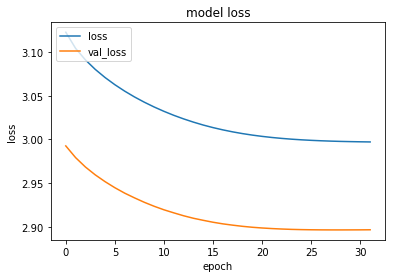

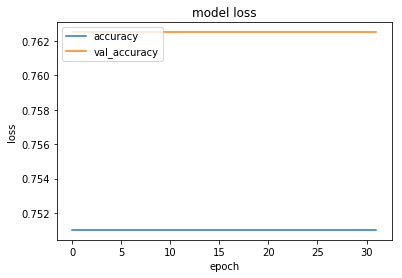

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0382 - acc: 0.7477 - val_loss: 3.9715 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0382 - acc: 0.7477 - val_loss: 3.9715 - val_acc: 0.7519
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0382 - acc: 0.7477 - val_loss: 3.9715 - val_acc: 0.7519
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0382 - acc: 0.7477 - val_loss: 3.9715 - val_acc: 0.7519
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


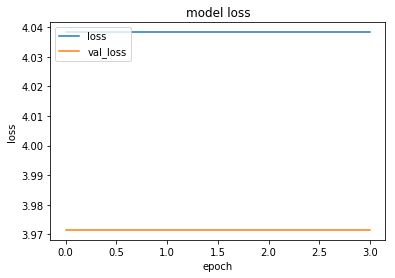

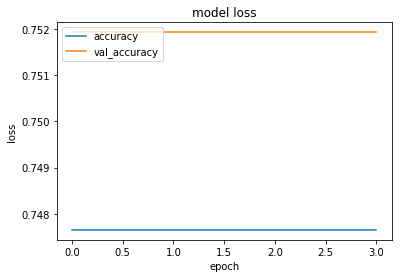

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 33us/step - loss: 3.9308 - acc: 0.7477 - val_loss: 3.7804 - val_acc: 0.7587
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.9301 - acc: 0.7477 - val_loss: 3.7798 - val_acc: 0.7587
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.9293 - acc: 0.7477 - val_loss: 3.7793 - val_acc: 0.7587
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.9285 - acc: 0.7477 - val_loss: 3.7786 - val_acc: 0.7587
Epoch 5/50
4157/4157 [==============================] - 0s 29us/step - loss: 3.9277 - acc: 0.7477 - val_loss: 3.7780 - val_acc: 0.7587
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.9269 - acc: 0.7477 - val_loss: 3.7774 - val_acc: 0.7587
Epoch 7/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.9261 - acc: 0.7477 - val_loss: 3

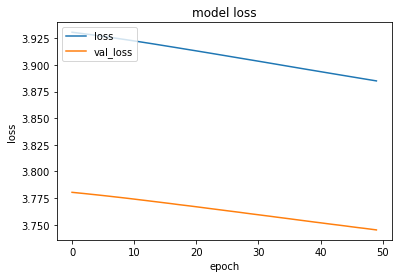

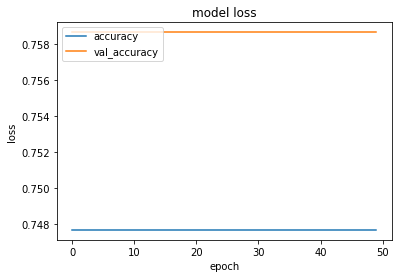

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 33us/step - loss: 4.0453 - acc: 0.7472 - val_loss: 3.9873 - val_acc: 0.7510
Epoch 2/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.0477 - acc: 0.7472 - val_loss: 3.9873 - val_acc: 0.7510
Epoch 3/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0477 - acc: 0.7472 - val_loss: 3.9873 - val_acc: 0.7510
Epoch 4/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0477 - acc: 0.7472 - val_loss: 3.9873 - val_acc: 0.7510
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


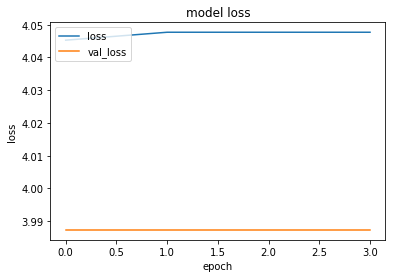

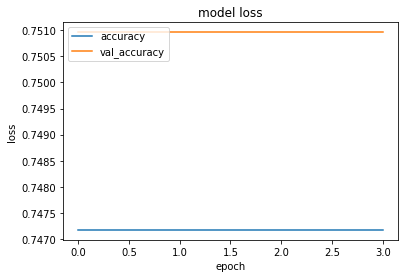

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0457 - acc: 0.7472 - val_loss: 4.1709 - val_acc: 0.7394
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.0457 - acc: 0.7472 - val_loss: 4.1709 - val_acc: 0.7394
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.0457 - acc: 0.7472 - val_loss: 4.1709 - val_acc: 0.7394
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0457 - acc: 0.7472 - val_loss: 4.1709 - val_acc: 0.7394
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


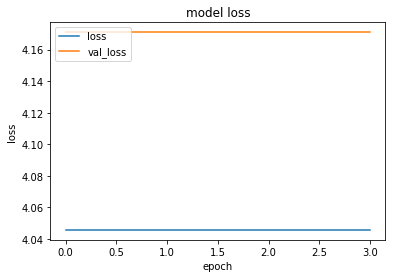

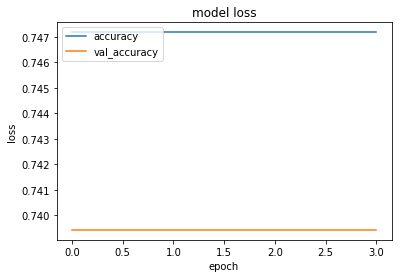

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0629 - acc: 0.7462 - val_loss: 3.9715 - val_acc: 0.7519
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.0629 - acc: 0.7462 - val_loss: 3.9715 - val_acc: 0.7519
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0629 - acc: 0.7462 - val_loss: 3.9715 - val_acc: 0.7519
Epoch 4/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.0629 - acc: 0.7462 - val_loss: 3.9715 - val_acc: 0.7519
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


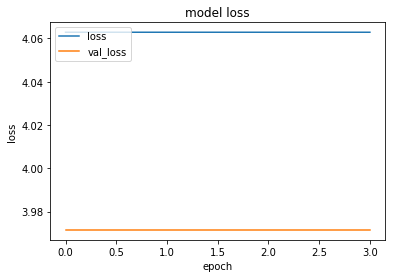

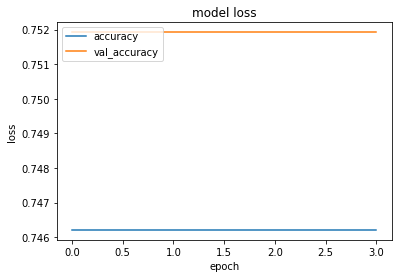

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 35us/step - loss: 4.0692 - acc: 0.7457 - val_loss: 4.1556 - val_acc: 0.7404
Epoch 2/50
4157/4157 [==============================] - 0s 33us/step - loss: 4.0692 - acc: 0.7457 - val_loss: 4.1556 - val_acc: 0.7404
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0692 - acc: 0.7457 - val_loss: 4.1556 - val_acc: 0.7404
Epoch 4/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0692 - acc: 0.7457 - val_loss: 4.1556 - val_acc: 0.7404
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


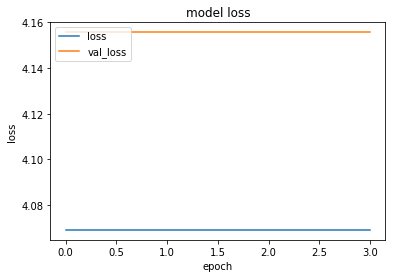

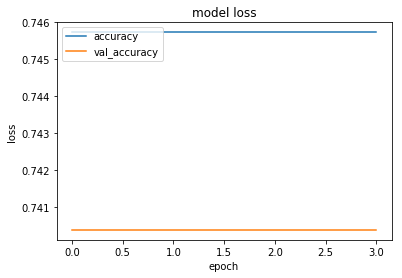

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0408 - acc: 0.7450 - val_loss: 4.2146 - val_acc: 0.7356
Epoch 2/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0405 - acc: 0.7450 - val_loss: 4.2145 - val_acc: 0.7356
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0402 - acc: 0.7450 - val_loss: 4.2144 - val_acc: 0.7356
Epoch 4/50
4157/4157 [==============================] - 0s 31us/step - loss: 4.0399 - acc: 0.7450 - val_loss: 4.2142 - val_acc: 0.7356
Epoch 5/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0397 - acc: 0.7450 - val_loss: 4.2141 - val_acc: 0.7356
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0394 - acc: 0.7450 - val_loss: 4.2140 - val_acc: 0.7356
Epoch 7/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0392 - acc: 0.7450 - val_loss: 4

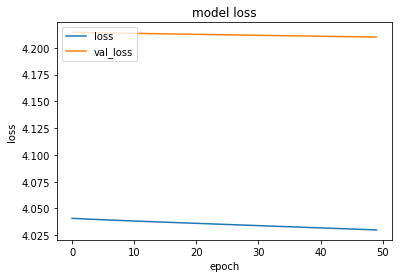

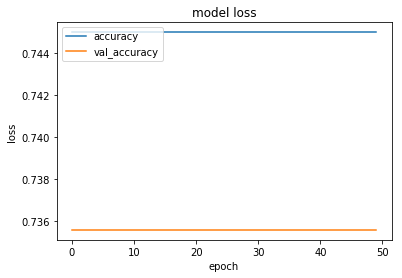

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 4.0985 - acc: 0.7440 - val_loss: 3.9264 - val_acc: 0.7548
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0985 - acc: 0.7440 - val_loss: 3.9264 - val_acc: 0.7548
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0985 - acc: 0.7440 - val_loss: 3.9264 - val_acc: 0.7548
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0985 - acc: 0.7440 - val_loss: 3.9264 - val_acc: 0.7548
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


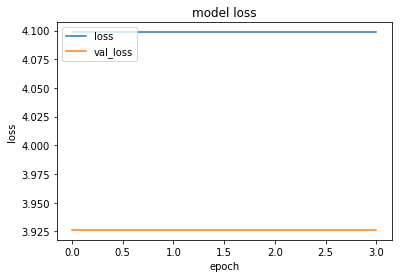

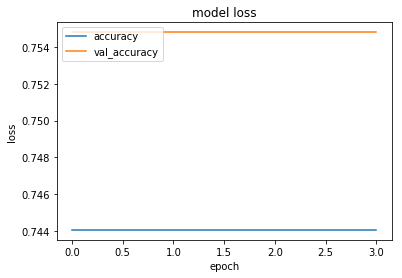

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 33us/step - loss: 4.0991 - acc: 0.7438 - val_loss: 4.0003 - val_acc: 0.7500
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0991 - acc: 0.7438 - val_loss: 4.0003 - val_acc: 0.7500
Epoch 3/50
4157/4157 [==============================] - 0s 29us/step - loss: 4.0991 - acc: 0.7438 - val_loss: 4.0003 - val_acc: 0.7500
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 4.0991 - acc: 0.7438 - val_loss: 4.0003 - val_acc: 0.7500
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


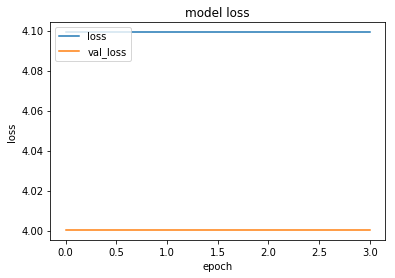

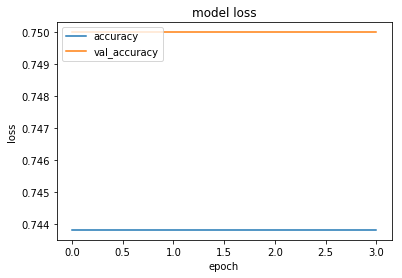

ES STEPS: 1 BEST SCORE: 0.7515 
ES STEPS: 2 BEST SCORE: 0.7525 
ES STEPS: 3 BEST SCORE: 0.7539 
ES STEPS: 4 BEST SCORE: 0.7558 
ES STEPS: 5 BEST SCORE: 0.7563 
ES STEPS: 6 BEST SCORE: 0.7563 
ES STEPS: 7 BEST SCORE: 0.7563 
ES STEPS: 8 BEST SCORE: 0.7563 
ES STEPS: 9 BEST SCORE: 0.7563 
ES STEPS: 10 BEST SCORE: 0.7563 
ES STEPS: 11 BEST SCORE: 0.7563 
ES STEPS: 12 BEST SCORE: 0.7570 
ES STEPS: 13 BEST SCORE: 0.7570 
ES STEPS: 14 BEST SCORE: 0.7570 
ES STEPS: 15 BEST SCORE: 0.7582 
ES STEPS: 16 BEST SCORE: 0.7582 
ES STEPS: 17 BEST SCORE: 0.7582 
ES STEPS: 18 BEST SCORE: 0.7602 
ES STEPS: 19 BEST SCORE: 0.7602 
ES STEPS: 20 BEST SCORE: 0.7602 
Stop: Reach max_steps
====================== 0 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 33us/step - loss: 3.7945 - acc: 0.7590 - val_loss: 3.8311 - val_acc: 0.7577
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.7931 - acc: 0.7590 - val_loss: 3.8

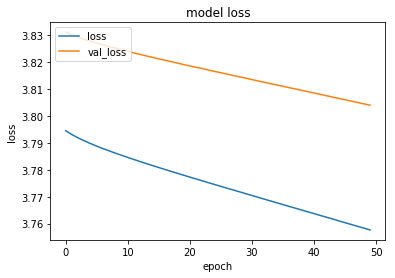

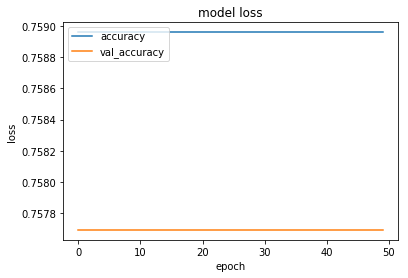

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.8661 - acc: 0.7585 - val_loss: 3.9868 - val_acc: 0.7510
Epoch 2/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.8661 - acc: 0.7585 - val_loss: 3.9868 - val_acc: 0.7510
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8661 - acc: 0.7585 - val_loss: 3.9868 - val_acc: 0.7510
Epoch 4/50
4157/4157 [==============================] - 0s 29us/step - loss: 3.8661 - acc: 0.7585 - val_loss: 3.9868 - val_acc: 0.7510
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


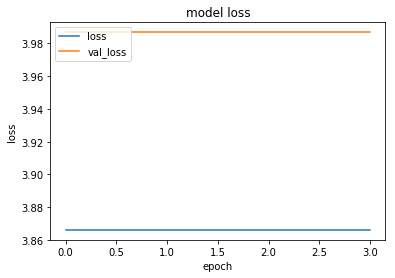

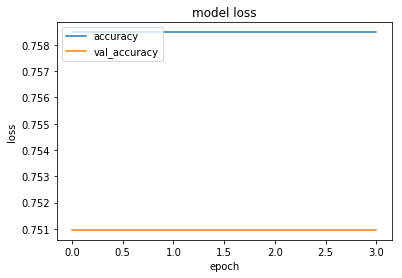

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 2.7351 - acc: 0.7585 - val_loss: 2.7264 - val_acc: 0.7510
Epoch 2/50
4157/4157 [==============================] - 0s 33us/step - loss: 2.7125 - acc: 0.7585 - val_loss: 2.7059 - val_acc: 0.7510
Epoch 3/50
4157/4157 [==============================] - 0s 31us/step - loss: 2.6969 - acc: 0.7585 - val_loss: 2.6908 - val_acc: 0.7510
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.6848 - acc: 0.7585 - val_loss: 2.6787 - val_acc: 0.7510
Epoch 5/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.6747 - acc: 0.7585 - val_loss: 2.6684 - val_acc: 0.7510
Epoch 6/50
4157/4157 [==============================] - 0s 30us/step - loss: 2.6661 - acc: 0.7585 - val_loss: 2.6595 - val_acc: 0.7510
Epoch 7/50
4157/4157 [==============================] - 0s 33us/step - loss: 2.6587 - acc: 0.7585 - val_loss: 2

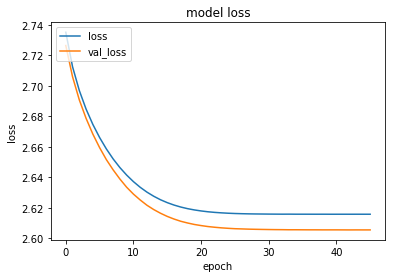

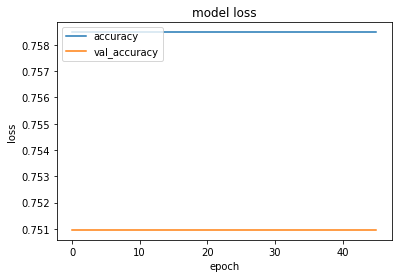

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 32us/step - loss: 3.8119 - acc: 0.7580 - val_loss: 3.9600 - val_acc: 0.7500
Epoch 2/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8115 - acc: 0.7580 - val_loss: 3.9597 - val_acc: 0.7500
Epoch 3/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8111 - acc: 0.7580 - val_loss: 3.9594 - val_acc: 0.7500
Epoch 4/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8106 - acc: 0.7580 - val_loss: 3.9591 - val_acc: 0.7500
Epoch 5/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8102 - acc: 0.7580 - val_loss: 3.9588 - val_acc: 0.7500
Epoch 6/50
4157/4157 [==============================] - 0s 31us/step - loss: 3.8097 - acc: 0.7580 - val_loss: 3.9585 - val_acc: 0.7500
Epoch 7/50
4157/4157 [==============================] - 0s 30us/step - loss: 3.8092 - acc: 0.7580 - val_loss: 3

KeyboardInterrupt: 

In [40]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, P_Best10_Weights, P_Best10_Sigma  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  for i, i_Weights in enumerate(P_Best10_Weights): 
      print('======================', i, 'of', len(P_Best10_Weights))  
      i_Weights = P_Best10_Weights[i]
      temp_flatten_weight = MyES._UnflattenWeights(WeightsStrucure = MyES.WeightsStrucure, ModifiedWeights = i_Weights)
      model, weights = ModelFit(model=model, weights=temp_flatten_weight, epochs=50)
      _, temp_unflatten_weight = MyES._FlattenWeights(weights) 
      P_Best10_Weights[i] = np.array(temp_unflatten_weight) 
  # ES
  weights, ES_Optimized_ObjVal, P_Best10_Weights, P_Best10_Sigma = MyES.run(weights, max_steps=20, verbose = 1,
                                                                            Population_Parents_Weights=P_Best10_Weights, 
                                                                            Population_Parents_Sigma=P_Best10_Sigma)
  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 5:
      break
    
Performance(model)